# MUSIC GENRE CLASSIFICATION WITH THE GTZAN DATASET

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import math
import IPython.display as ipd
import librosa   #python package used for audio and music analysis
import librosa.display #subpackage built on top of matplotlib that displays an audio's spectrogram

ModuleNotFoundError: No module named 'librosa'

In [43]:
pwd

'C:\\Users\\user'

In [50]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is C4B5-6FAC

 Directory of C:\Users\user

11/05/2021  08:10 PM    <DIR>          .
10/30/2021  08:54 PM    <DIR>          ..
10/24/2021  01:12 PM    <DIR>          .atom
10/23/2021  10:18 PM    <DIR>          .conda
10/23/2021  10:20 PM    <DIR>          .idlerc
11/05/2021  07:10 PM    <DIR>          .ipynb_checkpoints
10/28/2021  04:53 PM    <DIR>          .ipython
11/02/2021  11:49 PM    <DIR>          .jupyter
10/28/2021  06:18 PM    <DIR>          .matplotlib
11/04/2021  12:54 AM                19 .python_history
10/30/2021  07:59 PM    <DIR>          .spyder-py3
10/22/2021  05:33 AM    <DIR>          3D Objects
11/05/2021  07:34 PM    <DIR>          anaconda3
10/24/2021  01:04 AM    <DIR>          ansel
10/30/2021  08:57 PM    <DIR>          Contacts
11/05/2021  08:02 PM    <DIR>          Data
11/05/2021  06:08 PM            47,145 DATA  ANALYSIS STAGE 1.ipynb
10/24/2021  09:43 AM    <DIR>          Documents
11/05/2021  06:57

In [51]:
example_file = "Data/genres_original/disco/disco.00001.wav"

In [53]:
ipd.Audio(example_file)

In [154]:
signal,sample_rate=librosa.load(example_file)
#signal is an array of all the amplitudes within that audio file so range is from -1 to 1
#sample rate is the frequency of the audio i.e, number of waveforms per second (hertz)
#number of signals(number of samples per track)==>sample_rate*time_duration==>22050*30==>661500

In [145]:
print(signal)

[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [56]:
print(sample_rate)

22050


Text(0.5, 1.0, 'waveform')

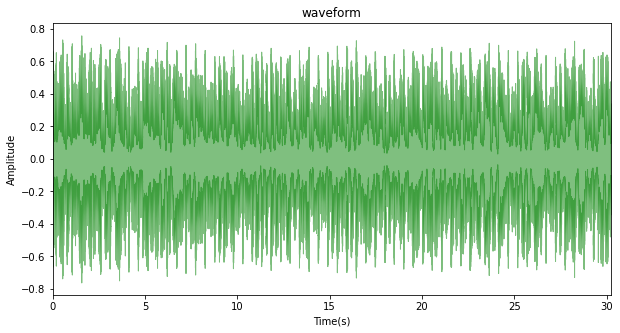

In [107]:
#PLOTTING THE WAVEFORM

plt.figure(figsize=(10,5)) #figure is an empty canvas for plotting
librosa.display.waveplot(signal,sample_rate,alpha=0.5,color='g') #alpha for opacity and waveplot displays spectrogram of the audio
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("waveform")

Text(0.5, 1.0, 'Full Power Spectrum')

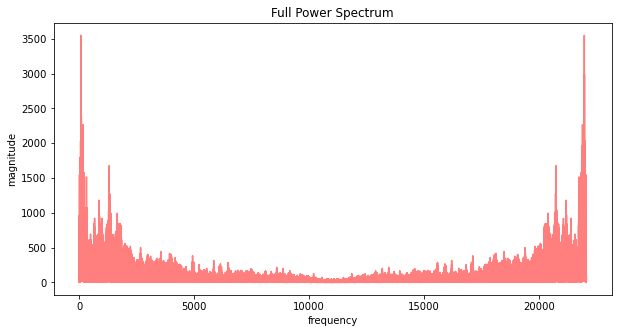

In [149]:
#FOURIER TRANSFORM USING FFT(FAST FOURIER TRANSFORM)
fft = np.fft.fft(signal) #fft is an array of complex values
magnitude = np.abs(fft) #magnitude is also an array but without complex values
frequency = np.linspace(0,sample_rate,len(magnitude)) #an array of frequencies

#PLOTTING THE POWER SPECTRUM
plt.figure(figsize=(10,5))
plt.plot(frequency,magnitude,alpha=0.5,color='r')
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.title("Full Power Spectrum")

Text(0.5, 1.0, 'Left half of Power Spectrum')

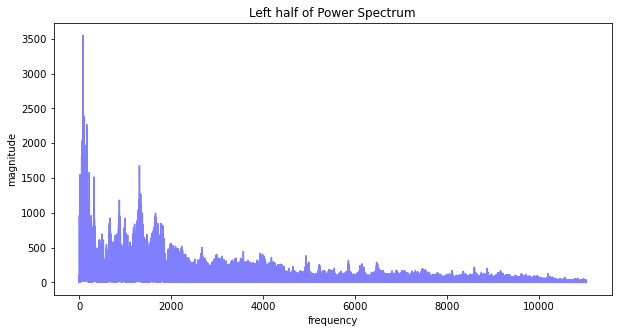

In [151]:
#the above power spectrum is symmetric i.e both left and right halves are the same
#considering the left half of the power spectrum 
left_magnitude=magnitude[:int(len(magnitude)/2)] #left half of the magnitude array
left_frequency=frequency[:int(len(frequency)/2)] #left half of frequency array

#PLOTTING THE LEFT HALF OF POWER SPECTRUM
plt.figure(figsize=(10,5))
plt.plot(left_frequency,left_magnitude,alpha=0.5,color='b')
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.title("Left half of Power Spectrum")

In [152]:
#the above only gives information on how the magnitude changes with the frequency

Text(0.5, 1.0, 'Mel Spectrogram')

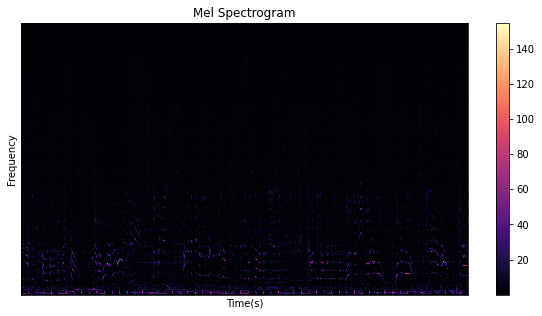

In [124]:
#SHORT TIME FOURIER TRANFORM(STFT) to find out how the magnitude changes with frequency for the duration of the time window(30s)
hop_length = 512 #the number of samples in a single audio frame.
n_fft = 2048 #the number of samples in a time window.
stft = librosa.stft(signal,n_fft = n_fft,hop_length = hop_length) #stft just like fft is also an array of complex values
spectrogram=np.abs(stft) #spectrogram is an array of non-complex values

#PLOTTING THE MEL SPECTROGRAM
plt.figure(figsize=(10,5))
librosa.display.specshow(spectrogram, sr = sample_rate, hop_length = hop_length)
plt.xlabel("Time(s)")
plt.ylabel("Frequency")
plt.colorbar() #similar to heatmap in seaborn
plt.title("Mel Spectrogram")

In [153]:
#just like in the previous power spectrum we have lower frequencies having higher magnitudes/amplitudes.

Text(0.5, 1.0, 'Mel Spectrogram (dB)')

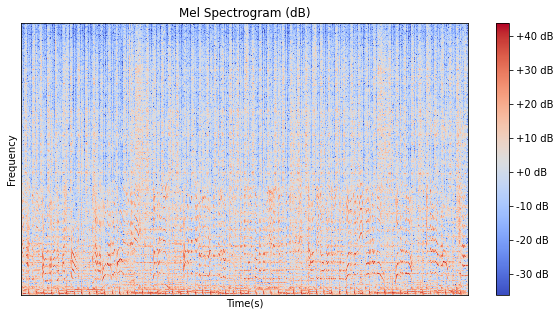

In [125]:
#A better way to represent the colorbar is by using decibels instead of magnitude/amplitude.
log_spectrogram = librosa.amplitude_to_db(spectrogram)

#PLOTTING THE MEL SPECTOGRAM IN DECIBELS
plt.figure(figsize=(10,5))
librosa.display.specshow(log_spectrogram, sr = sample_rate, hop_length = hop_length)
plt.xlabel("Time(s)")
plt.ylabel("Frequency")
plt.colorbar(format = "%+2.0f dB")
plt.title("Mel Spectrogram (dB)")

In [123]:
#lower frequencies have higher decibels

Text(0.5, 1.0, 'MFCCs')

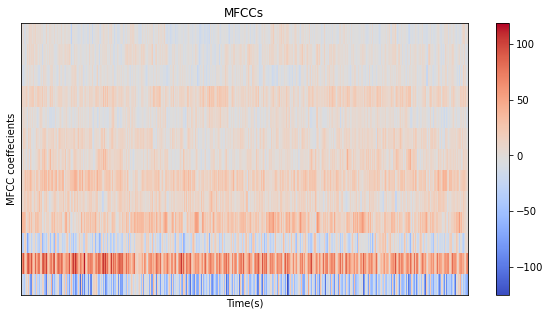

In [131]:
#creating 13 MFCCs for our Mel Spectrogram
MFCCs = librosa.feature.mfcc(signal,sample_rate,n_fft=n_fft,hop_length=hop_length,n_mfcc = 13 )

#PLOTTING MFCCs
plt.figure(figsize = (10,5))
librosa.display.specshow(MFCCs,sr = sample_rate, hop_length = hop_length)
plt.xlabel("Time(s)")
plt.ylabel("MFCC coeffecients")
plt.colorbar()
plt.title("MFCCs")

In [135]:
#so the MFFC plot of each audio wav file is what is passed into the input layer of a CNN model.

In [176]:
#therefore we compute the MFCC of each wav file
DATASET_PATH = "Data/genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [196]:
#function to extract mfccs of all wav files from dataset and save them into a json file
#with their genre labels

def save_mfcc(DATASET_PATH, JSON_PATH, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    data = {"mapping":[], "labels":[], "mfcc":[]}
    samples_per_segment = int(SAMPLES_PER_TRACK/num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment/hop_length)
    
    for i, (dirpath,dirnames,filenames) in enumerate(os.walk(DATASET_PATH)):
        if dirpath is not DATASET_PATH: #if its not genres_original then it entered subfolder level i.e blues,pop,rock...
           genre_label = dirpath.split('/')[-1]
           data["mapping"].append(genre_label)
           print("\nProcessing: {}".format(genre_label))
           for f in filenames: #names of all audio files within for eg blues folder
               file_path = os.path.join(dirpath,f) #this is the entire path of a wav file
               signal,sample_rate = librosa.load(file_path, sr = SAMPLE_RATE)
               for seg in range(num_segments): #for all the segments of an audio file
                #calculate start and finish sample for current segment
                start = samples_per_segment * seg
                finish = start + samples_per_segment
                #extract mfcc for each segment
                mfcc = librosa.feature.mfcc(signal[start:finish],SAMPLE_RATE,n_mfcc=num_mfcc,n_fft=n_fft,hop_length=hop_length)
                mfcc = mfcc.T
                if len(mfcc)==num_mfcc_vectors_per_segment:
                    data["mfcc"].append(mfcc.tolist())
                    data["labels"].append(i-1)
                    print("{}, segment:{}".format(file_path,seg+1))
                    
        #saving mfccs to json file
        with open(JSON_PATH, "w") as fp:
            json.dump(data, fp, indent=4)

In [199]:
save_mfcc(DATASET_PATH, JSON_PATH, 13, 2048, 512, num_segments = 10)
#10 genres, #100 audio files in each, #each audio file split into 10 segments, each segment having its own mfcc


Processing: genres_original\blues
Data/genres_original\blues\blues.00000.wav, segment:1
Data/genres_original\blues\blues.00000.wav, segment:2
Data/genres_original\blues\blues.00000.wav, segment:3
Data/genres_original\blues\blues.00000.wav, segment:4
Data/genres_original\blues\blues.00000.wav, segment:5
Data/genres_original\blues\blues.00000.wav, segment:6
Data/genres_original\blues\blues.00000.wav, segment:7
Data/genres_original\blues\blues.00000.wav, segment:8
Data/genres_original\blues\blues.00000.wav, segment:9
Data/genres_original\blues\blues.00000.wav, segment:10
Data/genres_original\blues\blues.00001.wav, segment:1
Data/genres_original\blues\blues.00001.wav, segment:2
Data/genres_original\blues\blues.00001.wav, segment:3
Data/genres_original\blues\blues.00001.wav, segment:4
Data/genres_original\blues\blues.00001.wav, segment:5
Data/genres_original\blues\blues.00001.wav, segment:6
Data/genres_original\blues\blues.00001.wav, segment:7
Data/genres_original\blues\blues.00001.wav, se

Data/genres_original\blues\blues.00016.wav, segment:7
Data/genres_original\blues\blues.00016.wav, segment:8
Data/genres_original\blues\blues.00016.wav, segment:9
Data/genres_original\blues\blues.00016.wav, segment:10
Data/genres_original\blues\blues.00017.wav, segment:1
Data/genres_original\blues\blues.00017.wav, segment:2
Data/genres_original\blues\blues.00017.wav, segment:3
Data/genres_original\blues\blues.00017.wav, segment:4
Data/genres_original\blues\blues.00017.wav, segment:5
Data/genres_original\blues\blues.00017.wav, segment:6
Data/genres_original\blues\blues.00017.wav, segment:7
Data/genres_original\blues\blues.00017.wav, segment:8
Data/genres_original\blues\blues.00017.wav, segment:9
Data/genres_original\blues\blues.00017.wav, segment:10
Data/genres_original\blues\blues.00018.wav, segment:1
Data/genres_original\blues\blues.00018.wav, segment:2
Data/genres_original\blues\blues.00018.wav, segment:3
Data/genres_original\blues\blues.00018.wav, segment:4
Data/genres_original\blues

Data/genres_original\blues\blues.00032.wav, segment:10
Data/genres_original\blues\blues.00033.wav, segment:1
Data/genres_original\blues\blues.00033.wav, segment:2
Data/genres_original\blues\blues.00033.wav, segment:3
Data/genres_original\blues\blues.00033.wav, segment:4
Data/genres_original\blues\blues.00033.wav, segment:5
Data/genres_original\blues\blues.00033.wav, segment:6
Data/genres_original\blues\blues.00033.wav, segment:7
Data/genres_original\blues\blues.00033.wav, segment:8
Data/genres_original\blues\blues.00033.wav, segment:9
Data/genres_original\blues\blues.00033.wav, segment:10
Data/genres_original\blues\blues.00034.wav, segment:1
Data/genres_original\blues\blues.00034.wav, segment:2
Data/genres_original\blues\blues.00034.wav, segment:3
Data/genres_original\blues\blues.00034.wav, segment:4
Data/genres_original\blues\blues.00034.wav, segment:5
Data/genres_original\blues\blues.00034.wav, segment:6
Data/genres_original\blues\blues.00034.wav, segment:7
Data/genres_original\blues

Data/genres_original\blues\blues.00048.wav, segment:8
Data/genres_original\blues\blues.00048.wav, segment:9
Data/genres_original\blues\blues.00048.wav, segment:10
Data/genres_original\blues\blues.00049.wav, segment:1
Data/genres_original\blues\blues.00049.wav, segment:2
Data/genres_original\blues\blues.00049.wav, segment:3
Data/genres_original\blues\blues.00049.wav, segment:4
Data/genres_original\blues\blues.00049.wav, segment:5
Data/genres_original\blues\blues.00049.wav, segment:6
Data/genres_original\blues\blues.00049.wav, segment:7
Data/genres_original\blues\blues.00049.wav, segment:8
Data/genres_original\blues\blues.00049.wav, segment:9
Data/genres_original\blues\blues.00049.wav, segment:10
Data/genres_original\blues\blues.00050.wav, segment:1
Data/genres_original\blues\blues.00050.wav, segment:2
Data/genres_original\blues\blues.00050.wav, segment:3
Data/genres_original\blues\blues.00050.wav, segment:4
Data/genres_original\blues\blues.00050.wav, segment:5
Data/genres_original\blues

Data/genres_original\blues\blues.00065.wav, segment:8
Data/genres_original\blues\blues.00065.wav, segment:9
Data/genres_original\blues\blues.00065.wav, segment:10
Data/genres_original\blues\blues.00066.wav, segment:1
Data/genres_original\blues\blues.00066.wav, segment:2
Data/genres_original\blues\blues.00066.wav, segment:3
Data/genres_original\blues\blues.00066.wav, segment:4
Data/genres_original\blues\blues.00066.wav, segment:5
Data/genres_original\blues\blues.00066.wav, segment:6
Data/genres_original\blues\blues.00066.wav, segment:7
Data/genres_original\blues\blues.00066.wav, segment:8
Data/genres_original\blues\blues.00066.wav, segment:9
Data/genres_original\blues\blues.00066.wav, segment:10
Data/genres_original\blues\blues.00067.wav, segment:1
Data/genres_original\blues\blues.00067.wav, segment:2
Data/genres_original\blues\blues.00067.wav, segment:3
Data/genres_original\blues\blues.00067.wav, segment:4
Data/genres_original\blues\blues.00067.wav, segment:5
Data/genres_original\blues

Data/genres_original\blues\blues.00081.wav, segment:6
Data/genres_original\blues\blues.00081.wav, segment:7
Data/genres_original\blues\blues.00081.wav, segment:8
Data/genres_original\blues\blues.00081.wav, segment:9
Data/genres_original\blues\blues.00081.wav, segment:10
Data/genres_original\blues\blues.00082.wav, segment:1
Data/genres_original\blues\blues.00082.wav, segment:2
Data/genres_original\blues\blues.00082.wav, segment:3
Data/genres_original\blues\blues.00082.wav, segment:4
Data/genres_original\blues\blues.00082.wav, segment:5
Data/genres_original\blues\blues.00082.wav, segment:6
Data/genres_original\blues\blues.00082.wav, segment:7
Data/genres_original\blues\blues.00082.wav, segment:8
Data/genres_original\blues\blues.00082.wav, segment:9
Data/genres_original\blues\blues.00082.wav, segment:10
Data/genres_original\blues\blues.00083.wav, segment:1
Data/genres_original\blues\blues.00083.wav, segment:2
Data/genres_original\blues\blues.00083.wav, segment:3
Data/genres_original\blues

Data/genres_original\blues\blues.00097.wav, segment:10
Data/genres_original\blues\blues.00098.wav, segment:1
Data/genres_original\blues\blues.00098.wav, segment:2
Data/genres_original\blues\blues.00098.wav, segment:3
Data/genres_original\blues\blues.00098.wav, segment:4
Data/genres_original\blues\blues.00098.wav, segment:5
Data/genres_original\blues\blues.00098.wav, segment:6
Data/genres_original\blues\blues.00098.wav, segment:7
Data/genres_original\blues\blues.00098.wav, segment:8
Data/genres_original\blues\blues.00098.wav, segment:9
Data/genres_original\blues\blues.00098.wav, segment:10
Data/genres_original\blues\blues.00099.wav, segment:1
Data/genres_original\blues\blues.00099.wav, segment:2
Data/genres_original\blues\blues.00099.wav, segment:3
Data/genres_original\blues\blues.00099.wav, segment:4
Data/genres_original\blues\blues.00099.wav, segment:5
Data/genres_original\blues\blues.00099.wav, segment:6
Data/genres_original\blues\blues.00099.wav, segment:7
Data/genres_original\blues

Data/genres_original\classical\classical.00012.wav, segment:3
Data/genres_original\classical\classical.00012.wav, segment:4
Data/genres_original\classical\classical.00012.wav, segment:5
Data/genres_original\classical\classical.00012.wav, segment:6
Data/genres_original\classical\classical.00012.wav, segment:7
Data/genres_original\classical\classical.00012.wav, segment:8
Data/genres_original\classical\classical.00012.wav, segment:9
Data/genres_original\classical\classical.00012.wav, segment:10
Data/genres_original\classical\classical.00013.wav, segment:1
Data/genres_original\classical\classical.00013.wav, segment:2
Data/genres_original\classical\classical.00013.wav, segment:3
Data/genres_original\classical\classical.00013.wav, segment:4
Data/genres_original\classical\classical.00013.wav, segment:5
Data/genres_original\classical\classical.00013.wav, segment:6
Data/genres_original\classical\classical.00013.wav, segment:7
Data/genres_original\classical\classical.00013.wav, segment:8
Data/ge

Data/genres_original\classical\classical.00026.wav, segment:9
Data/genres_original\classical\classical.00026.wav, segment:10
Data/genres_original\classical\classical.00027.wav, segment:1
Data/genres_original\classical\classical.00027.wav, segment:2
Data/genres_original\classical\classical.00027.wav, segment:3
Data/genres_original\classical\classical.00027.wav, segment:4
Data/genres_original\classical\classical.00027.wav, segment:5
Data/genres_original\classical\classical.00027.wav, segment:6
Data/genres_original\classical\classical.00027.wav, segment:7
Data/genres_original\classical\classical.00027.wav, segment:8
Data/genres_original\classical\classical.00027.wav, segment:9
Data/genres_original\classical\classical.00027.wav, segment:10
Data/genres_original\classical\classical.00028.wav, segment:1
Data/genres_original\classical\classical.00028.wav, segment:2
Data/genres_original\classical\classical.00028.wav, segment:3
Data/genres_original\classical\classical.00028.wav, segment:4
Data/g

Data/genres_original\classical\classical.00041.wav, segment:3
Data/genres_original\classical\classical.00041.wav, segment:4
Data/genres_original\classical\classical.00041.wav, segment:5
Data/genres_original\classical\classical.00041.wav, segment:6
Data/genres_original\classical\classical.00041.wav, segment:7
Data/genres_original\classical\classical.00041.wav, segment:8
Data/genres_original\classical\classical.00041.wav, segment:9
Data/genres_original\classical\classical.00041.wav, segment:10
Data/genres_original\classical\classical.00042.wav, segment:1
Data/genres_original\classical\classical.00042.wav, segment:2
Data/genres_original\classical\classical.00042.wav, segment:3
Data/genres_original\classical\classical.00042.wav, segment:4
Data/genres_original\classical\classical.00042.wav, segment:5
Data/genres_original\classical\classical.00042.wav, segment:6
Data/genres_original\classical\classical.00042.wav, segment:7
Data/genres_original\classical\classical.00042.wav, segment:8
Data/ge

Data/genres_original\classical\classical.00056.wav, segment:2
Data/genres_original\classical\classical.00056.wav, segment:3
Data/genres_original\classical\classical.00056.wav, segment:4
Data/genres_original\classical\classical.00056.wav, segment:5
Data/genres_original\classical\classical.00056.wav, segment:6
Data/genres_original\classical\classical.00056.wav, segment:7
Data/genres_original\classical\classical.00056.wav, segment:8
Data/genres_original\classical\classical.00056.wav, segment:9
Data/genres_original\classical\classical.00056.wav, segment:10
Data/genres_original\classical\classical.00057.wav, segment:1
Data/genres_original\classical\classical.00057.wav, segment:2
Data/genres_original\classical\classical.00057.wav, segment:3
Data/genres_original\classical\classical.00057.wav, segment:4
Data/genres_original\classical\classical.00057.wav, segment:5
Data/genres_original\classical\classical.00057.wav, segment:6
Data/genres_original\classical\classical.00057.wav, segment:7
Data/ge

Data/genres_original\classical\classical.00070.wav, segment:6
Data/genres_original\classical\classical.00070.wav, segment:7
Data/genres_original\classical\classical.00070.wav, segment:8
Data/genres_original\classical\classical.00070.wav, segment:9
Data/genres_original\classical\classical.00070.wav, segment:10
Data/genres_original\classical\classical.00071.wav, segment:1
Data/genres_original\classical\classical.00071.wav, segment:2
Data/genres_original\classical\classical.00071.wav, segment:3
Data/genres_original\classical\classical.00071.wav, segment:4
Data/genres_original\classical\classical.00071.wav, segment:5
Data/genres_original\classical\classical.00071.wav, segment:6
Data/genres_original\classical\classical.00071.wav, segment:7
Data/genres_original\classical\classical.00071.wav, segment:8
Data/genres_original\classical\classical.00071.wav, segment:9
Data/genres_original\classical\classical.00071.wav, segment:10
Data/genres_original\classical\classical.00072.wav, segment:1
Data/g

Data/genres_original\classical\classical.00083.wav, segment:8
Data/genres_original\classical\classical.00083.wav, segment:9
Data/genres_original\classical\classical.00083.wav, segment:10
Data/genres_original\classical\classical.00084.wav, segment:1
Data/genres_original\classical\classical.00084.wav, segment:2
Data/genres_original\classical\classical.00084.wav, segment:3
Data/genres_original\classical\classical.00084.wav, segment:4
Data/genres_original\classical\classical.00084.wav, segment:5
Data/genres_original\classical\classical.00084.wav, segment:6
Data/genres_original\classical\classical.00084.wav, segment:7
Data/genres_original\classical\classical.00084.wav, segment:8
Data/genres_original\classical\classical.00084.wav, segment:9
Data/genres_original\classical\classical.00084.wav, segment:10
Data/genres_original\classical\classical.00085.wav, segment:1
Data/genres_original\classical\classical.00085.wav, segment:2
Data/genres_original\classical\classical.00085.wav, segment:3
Data/g

Data/genres_original\classical\classical.00098.wav, segment:4
Data/genres_original\classical\classical.00098.wav, segment:5
Data/genres_original\classical\classical.00098.wav, segment:6
Data/genres_original\classical\classical.00098.wav, segment:7
Data/genres_original\classical\classical.00098.wav, segment:8
Data/genres_original\classical\classical.00098.wav, segment:9
Data/genres_original\classical\classical.00098.wav, segment:10
Data/genres_original\classical\classical.00099.wav, segment:1
Data/genres_original\classical\classical.00099.wav, segment:2
Data/genres_original\classical\classical.00099.wav, segment:3
Data/genres_original\classical\classical.00099.wav, segment:4
Data/genres_original\classical\classical.00099.wav, segment:5
Data/genres_original\classical\classical.00099.wav, segment:6
Data/genres_original\classical\classical.00099.wav, segment:7
Data/genres_original\classical\classical.00099.wav, segment:8
Data/genres_original\classical\classical.00099.wav, segment:9
Data/ge

Data/genres_original\country\country.00012.wav, segment:7
Data/genres_original\country\country.00012.wav, segment:8
Data/genres_original\country\country.00012.wav, segment:9
Data/genres_original\country\country.00012.wav, segment:10
Data/genres_original\country\country.00013.wav, segment:1
Data/genres_original\country\country.00013.wav, segment:2
Data/genres_original\country\country.00013.wav, segment:3
Data/genres_original\country\country.00013.wav, segment:4
Data/genres_original\country\country.00013.wav, segment:5
Data/genres_original\country\country.00013.wav, segment:6
Data/genres_original\country\country.00013.wav, segment:7
Data/genres_original\country\country.00013.wav, segment:8
Data/genres_original\country\country.00013.wav, segment:9
Data/genres_original\country\country.00013.wav, segment:10
Data/genres_original\country\country.00014.wav, segment:1
Data/genres_original\country\country.00014.wav, segment:2
Data/genres_original\country\country.00014.wav, segment:3
Data/genres_

Data/genres_original\country\country.00029.wav, segment:1
Data/genres_original\country\country.00029.wav, segment:2
Data/genres_original\country\country.00029.wav, segment:3
Data/genres_original\country\country.00029.wav, segment:4
Data/genres_original\country\country.00029.wav, segment:5
Data/genres_original\country\country.00029.wav, segment:6
Data/genres_original\country\country.00029.wav, segment:7
Data/genres_original\country\country.00029.wav, segment:8
Data/genres_original\country\country.00029.wav, segment:9
Data/genres_original\country\country.00029.wav, segment:10
Data/genres_original\country\country.00030.wav, segment:1
Data/genres_original\country\country.00030.wav, segment:2
Data/genres_original\country\country.00030.wav, segment:3
Data/genres_original\country\country.00030.wav, segment:4
Data/genres_original\country\country.00030.wav, segment:5
Data/genres_original\country\country.00030.wav, segment:6
Data/genres_original\country\country.00030.wav, segment:7
Data/genres_o

Data/genres_original\country\country.00044.wav, segment:7
Data/genres_original\country\country.00044.wav, segment:8
Data/genres_original\country\country.00044.wav, segment:9
Data/genres_original\country\country.00044.wav, segment:10
Data/genres_original\country\country.00045.wav, segment:1
Data/genres_original\country\country.00045.wav, segment:2
Data/genres_original\country\country.00045.wav, segment:3
Data/genres_original\country\country.00045.wav, segment:4
Data/genres_original\country\country.00045.wav, segment:5
Data/genres_original\country\country.00045.wav, segment:6
Data/genres_original\country\country.00045.wav, segment:7
Data/genres_original\country\country.00045.wav, segment:8
Data/genres_original\country\country.00045.wav, segment:9
Data/genres_original\country\country.00045.wav, segment:10
Data/genres_original\country\country.00046.wav, segment:1
Data/genres_original\country\country.00046.wav, segment:2
Data/genres_original\country\country.00046.wav, segment:3
Data/genres_

Data/genres_original\country\country.00061.wav, segment:4
Data/genres_original\country\country.00061.wav, segment:5
Data/genres_original\country\country.00061.wav, segment:6
Data/genres_original\country\country.00061.wav, segment:7
Data/genres_original\country\country.00061.wav, segment:8
Data/genres_original\country\country.00061.wav, segment:9
Data/genres_original\country\country.00061.wav, segment:10
Data/genres_original\country\country.00062.wav, segment:1
Data/genres_original\country\country.00062.wav, segment:2
Data/genres_original\country\country.00062.wav, segment:3
Data/genres_original\country\country.00062.wav, segment:4
Data/genres_original\country\country.00062.wav, segment:5
Data/genres_original\country\country.00062.wav, segment:6
Data/genres_original\country\country.00062.wav, segment:7
Data/genres_original\country\country.00062.wav, segment:8
Data/genres_original\country\country.00062.wav, segment:9
Data/genres_original\country\country.00062.wav, segment:10
Data/genres_

Data/genres_original\country\country.00075.wav, segment:8
Data/genres_original\country\country.00075.wav, segment:9
Data/genres_original\country\country.00075.wav, segment:10
Data/genres_original\country\country.00076.wav, segment:1
Data/genres_original\country\country.00076.wav, segment:2
Data/genres_original\country\country.00076.wav, segment:3
Data/genres_original\country\country.00076.wav, segment:4
Data/genres_original\country\country.00076.wav, segment:5
Data/genres_original\country\country.00076.wav, segment:6
Data/genres_original\country\country.00076.wav, segment:7
Data/genres_original\country\country.00076.wav, segment:8
Data/genres_original\country\country.00076.wav, segment:9
Data/genres_original\country\country.00076.wav, segment:10
Data/genres_original\country\country.00077.wav, segment:1
Data/genres_original\country\country.00077.wav, segment:2
Data/genres_original\country\country.00077.wav, segment:3
Data/genres_original\country\country.00077.wav, segment:4
Data/genres_

Data/genres_original\country\country.00091.wav, segment:9
Data/genres_original\country\country.00091.wav, segment:10
Data/genres_original\country\country.00092.wav, segment:1
Data/genres_original\country\country.00092.wav, segment:2
Data/genres_original\country\country.00092.wav, segment:3
Data/genres_original\country\country.00092.wav, segment:4
Data/genres_original\country\country.00092.wav, segment:5
Data/genres_original\country\country.00092.wav, segment:6
Data/genres_original\country\country.00092.wav, segment:7
Data/genres_original\country\country.00092.wav, segment:8
Data/genres_original\country\country.00092.wav, segment:9
Data/genres_original\country\country.00092.wav, segment:10
Data/genres_original\country\country.00093.wav, segment:1
Data/genres_original\country\country.00093.wav, segment:2
Data/genres_original\country\country.00093.wav, segment:3
Data/genres_original\country\country.00093.wav, segment:4
Data/genres_original\country\country.00093.wav, segment:5
Data/genres_

Data/genres_original\disco\disco.00007.wav, segment:7
Data/genres_original\disco\disco.00007.wav, segment:8
Data/genres_original\disco\disco.00007.wav, segment:9
Data/genres_original\disco\disco.00007.wav, segment:10
Data/genres_original\disco\disco.00008.wav, segment:1
Data/genres_original\disco\disco.00008.wav, segment:2
Data/genres_original\disco\disco.00008.wav, segment:3
Data/genres_original\disco\disco.00008.wav, segment:4
Data/genres_original\disco\disco.00008.wav, segment:5
Data/genres_original\disco\disco.00008.wav, segment:6
Data/genres_original\disco\disco.00008.wav, segment:7
Data/genres_original\disco\disco.00008.wav, segment:8
Data/genres_original\disco\disco.00008.wav, segment:9
Data/genres_original\disco\disco.00008.wav, segment:10
Data/genres_original\disco\disco.00009.wav, segment:1
Data/genres_original\disco\disco.00009.wav, segment:2
Data/genres_original\disco\disco.00009.wav, segment:3
Data/genres_original\disco\disco.00009.wav, segment:4
Data/genres_original\disco

Data/genres_original\disco\disco.00023.wav, segment:1
Data/genres_original\disco\disco.00023.wav, segment:2
Data/genres_original\disco\disco.00023.wav, segment:3
Data/genres_original\disco\disco.00023.wav, segment:4
Data/genres_original\disco\disco.00023.wav, segment:5
Data/genres_original\disco\disco.00023.wav, segment:6
Data/genres_original\disco\disco.00023.wav, segment:7
Data/genres_original\disco\disco.00023.wav, segment:8
Data/genres_original\disco\disco.00023.wav, segment:9
Data/genres_original\disco\disco.00023.wav, segment:10
Data/genres_original\disco\disco.00024.wav, segment:1
Data/genres_original\disco\disco.00024.wav, segment:2
Data/genres_original\disco\disco.00024.wav, segment:3
Data/genres_original\disco\disco.00024.wav, segment:4
Data/genres_original\disco\disco.00024.wav, segment:5
Data/genres_original\disco\disco.00024.wav, segment:6
Data/genres_original\disco\disco.00024.wav, segment:7
Data/genres_original\disco\disco.00024.wav, segment:8
Data/genres_original\disco\

Data/genres_original\disco\disco.00040.wav, segment:2
Data/genres_original\disco\disco.00040.wav, segment:3
Data/genres_original\disco\disco.00040.wav, segment:4
Data/genres_original\disco\disco.00040.wav, segment:5
Data/genres_original\disco\disco.00040.wav, segment:6
Data/genres_original\disco\disco.00040.wav, segment:7
Data/genres_original\disco\disco.00040.wav, segment:8
Data/genres_original\disco\disco.00040.wav, segment:9
Data/genres_original\disco\disco.00040.wav, segment:10
Data/genres_original\disco\disco.00041.wav, segment:1
Data/genres_original\disco\disco.00041.wav, segment:2
Data/genres_original\disco\disco.00041.wav, segment:3
Data/genres_original\disco\disco.00041.wav, segment:4
Data/genres_original\disco\disco.00041.wav, segment:5
Data/genres_original\disco\disco.00041.wav, segment:6
Data/genres_original\disco\disco.00041.wav, segment:7
Data/genres_original\disco\disco.00041.wav, segment:8
Data/genres_original\disco\disco.00041.wav, segment:9
Data/genres_original\disco\

Data/genres_original\disco\disco.00055.wav, segment:9
Data/genres_original\disco\disco.00055.wav, segment:10
Data/genres_original\disco\disco.00056.wav, segment:1
Data/genres_original\disco\disco.00056.wav, segment:2
Data/genres_original\disco\disco.00056.wav, segment:3
Data/genres_original\disco\disco.00056.wav, segment:4
Data/genres_original\disco\disco.00056.wav, segment:5
Data/genres_original\disco\disco.00056.wav, segment:6
Data/genres_original\disco\disco.00056.wav, segment:7
Data/genres_original\disco\disco.00056.wav, segment:8
Data/genres_original\disco\disco.00056.wav, segment:9
Data/genres_original\disco\disco.00056.wav, segment:10
Data/genres_original\disco\disco.00057.wav, segment:1
Data/genres_original\disco\disco.00057.wav, segment:2
Data/genres_original\disco\disco.00057.wav, segment:3
Data/genres_original\disco\disco.00057.wav, segment:4
Data/genres_original\disco\disco.00057.wav, segment:5
Data/genres_original\disco\disco.00057.wav, segment:6
Data/genres_original\disco

Data/genres_original\disco\disco.00073.wav, segment:3
Data/genres_original\disco\disco.00073.wav, segment:4
Data/genres_original\disco\disco.00073.wav, segment:5
Data/genres_original\disco\disco.00073.wav, segment:6
Data/genres_original\disco\disco.00073.wav, segment:7
Data/genres_original\disco\disco.00073.wav, segment:8
Data/genres_original\disco\disco.00073.wav, segment:9
Data/genres_original\disco\disco.00073.wav, segment:10
Data/genres_original\disco\disco.00074.wav, segment:1
Data/genres_original\disco\disco.00074.wav, segment:2
Data/genres_original\disco\disco.00074.wav, segment:3
Data/genres_original\disco\disco.00074.wav, segment:4
Data/genres_original\disco\disco.00074.wav, segment:5
Data/genres_original\disco\disco.00074.wav, segment:6
Data/genres_original\disco\disco.00074.wav, segment:7
Data/genres_original\disco\disco.00074.wav, segment:8
Data/genres_original\disco\disco.00074.wav, segment:9
Data/genres_original\disco\disco.00074.wav, segment:10
Data/genres_original\disco

Data/genres_original\disco\disco.00089.wav, segment:5
Data/genres_original\disco\disco.00089.wav, segment:6
Data/genres_original\disco\disco.00089.wav, segment:7
Data/genres_original\disco\disco.00089.wav, segment:8
Data/genres_original\disco\disco.00089.wav, segment:9
Data/genres_original\disco\disco.00089.wav, segment:10
Data/genres_original\disco\disco.00090.wav, segment:1
Data/genres_original\disco\disco.00090.wav, segment:2
Data/genres_original\disco\disco.00090.wav, segment:3
Data/genres_original\disco\disco.00090.wav, segment:4
Data/genres_original\disco\disco.00090.wav, segment:5
Data/genres_original\disco\disco.00090.wav, segment:6
Data/genres_original\disco\disco.00090.wav, segment:7
Data/genres_original\disco\disco.00090.wav, segment:8
Data/genres_original\disco\disco.00090.wav, segment:9
Data/genres_original\disco\disco.00090.wav, segment:10
Data/genres_original\disco\disco.00091.wav, segment:1
Data/genres_original\disco\disco.00091.wav, segment:2
Data/genres_original\disco

Data/genres_original\hiphop\hiphop.00005.wav, segment:6
Data/genres_original\hiphop\hiphop.00005.wav, segment:7
Data/genres_original\hiphop\hiphop.00005.wav, segment:8
Data/genres_original\hiphop\hiphop.00005.wav, segment:9
Data/genres_original\hiphop\hiphop.00005.wav, segment:10
Data/genres_original\hiphop\hiphop.00006.wav, segment:1
Data/genres_original\hiphop\hiphop.00006.wav, segment:2
Data/genres_original\hiphop\hiphop.00006.wav, segment:3
Data/genres_original\hiphop\hiphop.00006.wav, segment:4
Data/genres_original\hiphop\hiphop.00006.wav, segment:5
Data/genres_original\hiphop\hiphop.00006.wav, segment:6
Data/genres_original\hiphop\hiphop.00006.wav, segment:7
Data/genres_original\hiphop\hiphop.00006.wav, segment:8
Data/genres_original\hiphop\hiphop.00006.wav, segment:9
Data/genres_original\hiphop\hiphop.00006.wav, segment:10
Data/genres_original\hiphop\hiphop.00007.wav, segment:1
Data/genres_original\hiphop\hiphop.00007.wav, segment:2
Data/genres_original\hiphop\hiphop.00007.wav, 

Data/genres_original\hiphop\hiphop.00022.wav, segment:5
Data/genres_original\hiphop\hiphop.00022.wav, segment:6
Data/genres_original\hiphop\hiphop.00022.wav, segment:7
Data/genres_original\hiphop\hiphop.00022.wav, segment:8
Data/genres_original\hiphop\hiphop.00022.wav, segment:9
Data/genres_original\hiphop\hiphop.00022.wav, segment:10
Data/genres_original\hiphop\hiphop.00023.wav, segment:1
Data/genres_original\hiphop\hiphop.00023.wav, segment:2
Data/genres_original\hiphop\hiphop.00023.wav, segment:3
Data/genres_original\hiphop\hiphop.00023.wav, segment:4
Data/genres_original\hiphop\hiphop.00023.wav, segment:5
Data/genres_original\hiphop\hiphop.00023.wav, segment:6
Data/genres_original\hiphop\hiphop.00023.wav, segment:7
Data/genres_original\hiphop\hiphop.00023.wav, segment:8
Data/genres_original\hiphop\hiphop.00023.wav, segment:9
Data/genres_original\hiphop\hiphop.00023.wav, segment:10
Data/genres_original\hiphop\hiphop.00024.wav, segment:1
Data/genres_original\hiphop\hiphop.00024.wav, 

Data/genres_original\hiphop\hiphop.00039.wav, segment:4
Data/genres_original\hiphop\hiphop.00039.wav, segment:5
Data/genres_original\hiphop\hiphop.00039.wav, segment:6
Data/genres_original\hiphop\hiphop.00039.wav, segment:7
Data/genres_original\hiphop\hiphop.00039.wav, segment:8
Data/genres_original\hiphop\hiphop.00039.wav, segment:9
Data/genres_original\hiphop\hiphop.00039.wav, segment:10
Data/genres_original\hiphop\hiphop.00040.wav, segment:1
Data/genres_original\hiphop\hiphop.00040.wav, segment:2
Data/genres_original\hiphop\hiphop.00040.wav, segment:3
Data/genres_original\hiphop\hiphop.00040.wav, segment:4
Data/genres_original\hiphop\hiphop.00040.wav, segment:5
Data/genres_original\hiphop\hiphop.00040.wav, segment:6
Data/genres_original\hiphop\hiphop.00040.wav, segment:7
Data/genres_original\hiphop\hiphop.00040.wav, segment:8
Data/genres_original\hiphop\hiphop.00040.wav, segment:9
Data/genres_original\hiphop\hiphop.00040.wav, segment:10
Data/genres_original\hiphop\hiphop.00041.wav, 

Data/genres_original\hiphop\hiphop.00056.wav, segment:4
Data/genres_original\hiphop\hiphop.00056.wav, segment:5
Data/genres_original\hiphop\hiphop.00056.wav, segment:6
Data/genres_original\hiphop\hiphop.00056.wav, segment:7
Data/genres_original\hiphop\hiphop.00056.wav, segment:8
Data/genres_original\hiphop\hiphop.00056.wav, segment:9
Data/genres_original\hiphop\hiphop.00056.wav, segment:10
Data/genres_original\hiphop\hiphop.00057.wav, segment:1
Data/genres_original\hiphop\hiphop.00057.wav, segment:2
Data/genres_original\hiphop\hiphop.00057.wav, segment:3
Data/genres_original\hiphop\hiphop.00057.wav, segment:4
Data/genres_original\hiphop\hiphop.00057.wav, segment:5
Data/genres_original\hiphop\hiphop.00057.wav, segment:6
Data/genres_original\hiphop\hiphop.00057.wav, segment:7
Data/genres_original\hiphop\hiphop.00057.wav, segment:8
Data/genres_original\hiphop\hiphop.00057.wav, segment:9
Data/genres_original\hiphop\hiphop.00057.wav, segment:10
Data/genres_original\hiphop\hiphop.00058.wav, 

Data/genres_original\hiphop\hiphop.00073.wav, segment:2
Data/genres_original\hiphop\hiphop.00073.wav, segment:3
Data/genres_original\hiphop\hiphop.00073.wav, segment:4
Data/genres_original\hiphop\hiphop.00073.wav, segment:5
Data/genres_original\hiphop\hiphop.00073.wav, segment:6
Data/genres_original\hiphop\hiphop.00073.wav, segment:7
Data/genres_original\hiphop\hiphop.00073.wav, segment:8
Data/genres_original\hiphop\hiphop.00073.wav, segment:9
Data/genres_original\hiphop\hiphop.00073.wav, segment:10
Data/genres_original\hiphop\hiphop.00074.wav, segment:1
Data/genres_original\hiphop\hiphop.00074.wav, segment:2
Data/genres_original\hiphop\hiphop.00074.wav, segment:3
Data/genres_original\hiphop\hiphop.00074.wav, segment:4
Data/genres_original\hiphop\hiphop.00074.wav, segment:5
Data/genres_original\hiphop\hiphop.00074.wav, segment:6
Data/genres_original\hiphop\hiphop.00074.wav, segment:7
Data/genres_original\hiphop\hiphop.00074.wav, segment:8
Data/genres_original\hiphop\hiphop.00074.wav, s

Data/genres_original\hiphop\hiphop.00090.wav, segment:3
Data/genres_original\hiphop\hiphop.00090.wav, segment:4
Data/genres_original\hiphop\hiphop.00090.wav, segment:5
Data/genres_original\hiphop\hiphop.00090.wav, segment:6
Data/genres_original\hiphop\hiphop.00090.wav, segment:7
Data/genres_original\hiphop\hiphop.00090.wav, segment:8
Data/genres_original\hiphop\hiphop.00090.wav, segment:9
Data/genres_original\hiphop\hiphop.00090.wav, segment:10
Data/genres_original\hiphop\hiphop.00091.wav, segment:1
Data/genres_original\hiphop\hiphop.00091.wav, segment:2
Data/genres_original\hiphop\hiphop.00091.wav, segment:3
Data/genres_original\hiphop\hiphop.00091.wav, segment:4
Data/genres_original\hiphop\hiphop.00091.wav, segment:5
Data/genres_original\hiphop\hiphop.00091.wav, segment:6
Data/genres_original\hiphop\hiphop.00091.wav, segment:7
Data/genres_original\hiphop\hiphop.00091.wav, segment:8
Data/genres_original\hiphop\hiphop.00091.wav, segment:9
Data/genres_original\hiphop\hiphop.00091.wav, s

Data/genres_original\jazz\jazz.00005.wav, segment:5
Data/genres_original\jazz\jazz.00005.wav, segment:6
Data/genres_original\jazz\jazz.00005.wav, segment:7
Data/genres_original\jazz\jazz.00005.wav, segment:8
Data/genres_original\jazz\jazz.00005.wav, segment:9
Data/genres_original\jazz\jazz.00005.wav, segment:10
Data/genres_original\jazz\jazz.00006.wav, segment:1
Data/genres_original\jazz\jazz.00006.wav, segment:2
Data/genres_original\jazz\jazz.00006.wav, segment:3
Data/genres_original\jazz\jazz.00006.wav, segment:4
Data/genres_original\jazz\jazz.00006.wav, segment:5
Data/genres_original\jazz\jazz.00006.wav, segment:6
Data/genres_original\jazz\jazz.00006.wav, segment:7
Data/genres_original\jazz\jazz.00006.wav, segment:8
Data/genres_original\jazz\jazz.00006.wav, segment:9
Data/genres_original\jazz\jazz.00006.wav, segment:10
Data/genres_original\jazz\jazz.00007.wav, segment:1
Data/genres_original\jazz\jazz.00007.wav, segment:2
Data/genres_original\jazz\jazz.00007.wav, segment:3
Data/genre

Data/genres_original\jazz\jazz.00022.wav, segment:4
Data/genres_original\jazz\jazz.00022.wav, segment:5
Data/genres_original\jazz\jazz.00022.wav, segment:6
Data/genres_original\jazz\jazz.00022.wav, segment:7
Data/genres_original\jazz\jazz.00022.wav, segment:8
Data/genres_original\jazz\jazz.00022.wav, segment:9
Data/genres_original\jazz\jazz.00022.wav, segment:10
Data/genres_original\jazz\jazz.00023.wav, segment:1
Data/genres_original\jazz\jazz.00023.wav, segment:2
Data/genres_original\jazz\jazz.00023.wav, segment:3
Data/genres_original\jazz\jazz.00023.wav, segment:4
Data/genres_original\jazz\jazz.00023.wav, segment:5
Data/genres_original\jazz\jazz.00023.wav, segment:6
Data/genres_original\jazz\jazz.00023.wav, segment:7
Data/genres_original\jazz\jazz.00023.wav, segment:8
Data/genres_original\jazz\jazz.00023.wav, segment:9
Data/genres_original\jazz\jazz.00023.wav, segment:10
Data/genres_original\jazz\jazz.00024.wav, segment:1
Data/genres_original\jazz\jazz.00024.wav, segment:2
Data/genre

Data/genres_original\jazz\jazz.00039.wav, segment:1
Data/genres_original\jazz\jazz.00039.wav, segment:2
Data/genres_original\jazz\jazz.00039.wav, segment:3
Data/genres_original\jazz\jazz.00039.wav, segment:4
Data/genres_original\jazz\jazz.00039.wav, segment:5
Data/genres_original\jazz\jazz.00039.wav, segment:6
Data/genres_original\jazz\jazz.00039.wav, segment:7
Data/genres_original\jazz\jazz.00039.wav, segment:8
Data/genres_original\jazz\jazz.00039.wav, segment:9
Data/genres_original\jazz\jazz.00039.wav, segment:10
Data/genres_original\jazz\jazz.00040.wav, segment:1
Data/genres_original\jazz\jazz.00040.wav, segment:2
Data/genres_original\jazz\jazz.00040.wav, segment:3
Data/genres_original\jazz\jazz.00040.wav, segment:4
Data/genres_original\jazz\jazz.00040.wav, segment:5
Data/genres_original\jazz\jazz.00040.wav, segment:6
Data/genres_original\jazz\jazz.00040.wav, segment:7
Data/genres_original\jazz\jazz.00040.wav, segment:8
Data/genres_original\jazz\jazz.00040.wav, segment:9
Data/genres

Data/genres_original\jazz\jazz.00057.wav, segment:5
Data/genres_original\jazz\jazz.00057.wav, segment:6
Data/genres_original\jazz\jazz.00057.wav, segment:7
Data/genres_original\jazz\jazz.00057.wav, segment:8
Data/genres_original\jazz\jazz.00057.wav, segment:9
Data/genres_original\jazz\jazz.00057.wav, segment:10
Data/genres_original\jazz\jazz.00058.wav, segment:1
Data/genres_original\jazz\jazz.00058.wav, segment:2
Data/genres_original\jazz\jazz.00058.wav, segment:3
Data/genres_original\jazz\jazz.00058.wav, segment:4
Data/genres_original\jazz\jazz.00058.wav, segment:5
Data/genres_original\jazz\jazz.00058.wav, segment:6
Data/genres_original\jazz\jazz.00058.wav, segment:7
Data/genres_original\jazz\jazz.00058.wav, segment:8
Data/genres_original\jazz\jazz.00058.wav, segment:9
Data/genres_original\jazz\jazz.00058.wav, segment:10
Data/genres_original\jazz\jazz.00059.wav, segment:1
Data/genres_original\jazz\jazz.00059.wav, segment:2
Data/genres_original\jazz\jazz.00059.wav, segment:3
Data/genre

Data/genres_original\jazz\jazz.00074.wav, segment:7
Data/genres_original\jazz\jazz.00074.wav, segment:8
Data/genres_original\jazz\jazz.00074.wav, segment:9
Data/genres_original\jazz\jazz.00074.wav, segment:10
Data/genres_original\jazz\jazz.00075.wav, segment:1
Data/genres_original\jazz\jazz.00075.wav, segment:2
Data/genres_original\jazz\jazz.00075.wav, segment:3
Data/genres_original\jazz\jazz.00075.wav, segment:4
Data/genres_original\jazz\jazz.00075.wav, segment:5
Data/genres_original\jazz\jazz.00075.wav, segment:6
Data/genres_original\jazz\jazz.00075.wav, segment:7
Data/genres_original\jazz\jazz.00075.wav, segment:8
Data/genres_original\jazz\jazz.00075.wav, segment:9
Data/genres_original\jazz\jazz.00075.wav, segment:10
Data/genres_original\jazz\jazz.00076.wav, segment:1
Data/genres_original\jazz\jazz.00076.wav, segment:2
Data/genres_original\jazz\jazz.00076.wav, segment:3
Data/genres_original\jazz\jazz.00076.wav, segment:4
Data/genres_original\jazz\jazz.00076.wav, segment:5
Data/genre

Data/genres_original\jazz\jazz.00090.wav, segment:9
Data/genres_original\jazz\jazz.00090.wav, segment:10
Data/genres_original\jazz\jazz.00091.wav, segment:1
Data/genres_original\jazz\jazz.00091.wav, segment:2
Data/genres_original\jazz\jazz.00091.wav, segment:3
Data/genres_original\jazz\jazz.00091.wav, segment:4
Data/genres_original\jazz\jazz.00091.wav, segment:5
Data/genres_original\jazz\jazz.00091.wav, segment:6
Data/genres_original\jazz\jazz.00091.wav, segment:7
Data/genres_original\jazz\jazz.00091.wav, segment:8
Data/genres_original\jazz\jazz.00091.wav, segment:9
Data/genres_original\jazz\jazz.00091.wav, segment:10
Data/genres_original\jazz\jazz.00092.wav, segment:1
Data/genres_original\jazz\jazz.00092.wav, segment:2
Data/genres_original\jazz\jazz.00092.wav, segment:3
Data/genres_original\jazz\jazz.00092.wav, segment:4
Data/genres_original\jazz\jazz.00092.wav, segment:5
Data/genres_original\jazz\jazz.00092.wav, segment:6
Data/genres_original\jazz\jazz.00092.wav, segment:7
Data/genre

Data/genres_original\metal\metal.00006.wav, segment:9
Data/genres_original\metal\metal.00006.wav, segment:10
Data/genres_original\metal\metal.00007.wav, segment:1
Data/genres_original\metal\metal.00007.wav, segment:2
Data/genres_original\metal\metal.00007.wav, segment:3
Data/genres_original\metal\metal.00007.wav, segment:4
Data/genres_original\metal\metal.00007.wav, segment:5
Data/genres_original\metal\metal.00007.wav, segment:6
Data/genres_original\metal\metal.00007.wav, segment:7
Data/genres_original\metal\metal.00007.wav, segment:8
Data/genres_original\metal\metal.00007.wav, segment:9
Data/genres_original\metal\metal.00007.wav, segment:10
Data/genres_original\metal\metal.00008.wav, segment:1
Data/genres_original\metal\metal.00008.wav, segment:2
Data/genres_original\metal\metal.00008.wav, segment:3
Data/genres_original\metal\metal.00008.wav, segment:4
Data/genres_original\metal\metal.00008.wav, segment:5
Data/genres_original\metal\metal.00008.wav, segment:6
Data/genres_original\metal

Data/genres_original\metal\metal.00024.wav, segment:2
Data/genres_original\metal\metal.00024.wav, segment:3
Data/genres_original\metal\metal.00024.wav, segment:4
Data/genres_original\metal\metal.00024.wav, segment:5
Data/genres_original\metal\metal.00024.wav, segment:6
Data/genres_original\metal\metal.00024.wav, segment:7
Data/genres_original\metal\metal.00024.wav, segment:8
Data/genres_original\metal\metal.00024.wav, segment:9
Data/genres_original\metal\metal.00024.wav, segment:10
Data/genres_original\metal\metal.00025.wav, segment:1
Data/genres_original\metal\metal.00025.wav, segment:2
Data/genres_original\metal\metal.00025.wav, segment:3
Data/genres_original\metal\metal.00025.wav, segment:4
Data/genres_original\metal\metal.00025.wav, segment:5
Data/genres_original\metal\metal.00025.wav, segment:6
Data/genres_original\metal\metal.00025.wav, segment:7
Data/genres_original\metal\metal.00025.wav, segment:8
Data/genres_original\metal\metal.00025.wav, segment:9
Data/genres_original\metal\

Data/genres_original\metal\metal.00040.wav, segment:8
Data/genres_original\metal\metal.00040.wav, segment:9
Data/genres_original\metal\metal.00040.wav, segment:10
Data/genres_original\metal\metal.00041.wav, segment:1
Data/genres_original\metal\metal.00041.wav, segment:2
Data/genres_original\metal\metal.00041.wav, segment:3
Data/genres_original\metal\metal.00041.wav, segment:4
Data/genres_original\metal\metal.00041.wav, segment:5
Data/genres_original\metal\metal.00041.wav, segment:6
Data/genres_original\metal\metal.00041.wav, segment:7
Data/genres_original\metal\metal.00041.wav, segment:8
Data/genres_original\metal\metal.00041.wav, segment:9
Data/genres_original\metal\metal.00041.wav, segment:10
Data/genres_original\metal\metal.00042.wav, segment:1
Data/genres_original\metal\metal.00042.wav, segment:2
Data/genres_original\metal\metal.00042.wav, segment:3
Data/genres_original\metal\metal.00042.wav, segment:4
Data/genres_original\metal\metal.00042.wav, segment:5
Data/genres_original\metal

Data/genres_original\metal\metal.00057.wav, segment:8
Data/genres_original\metal\metal.00057.wav, segment:9
Data/genres_original\metal\metal.00057.wav, segment:10
Data/genres_original\metal\metal.00058.wav, segment:1
Data/genres_original\metal\metal.00058.wav, segment:2
Data/genres_original\metal\metal.00058.wav, segment:3
Data/genres_original\metal\metal.00058.wav, segment:4
Data/genres_original\metal\metal.00058.wav, segment:5
Data/genres_original\metal\metal.00058.wav, segment:6
Data/genres_original\metal\metal.00058.wav, segment:7
Data/genres_original\metal\metal.00058.wav, segment:8
Data/genres_original\metal\metal.00058.wav, segment:9
Data/genres_original\metal\metal.00058.wav, segment:10
Data/genres_original\metal\metal.00059.wav, segment:1
Data/genres_original\metal\metal.00059.wav, segment:2
Data/genres_original\metal\metal.00059.wav, segment:3
Data/genres_original\metal\metal.00059.wav, segment:4
Data/genres_original\metal\metal.00059.wav, segment:5
Data/genres_original\metal

Data/genres_original\metal\metal.00074.wav, segment:8
Data/genres_original\metal\metal.00074.wav, segment:9
Data/genres_original\metal\metal.00074.wav, segment:10
Data/genres_original\metal\metal.00075.wav, segment:1
Data/genres_original\metal\metal.00075.wav, segment:2
Data/genres_original\metal\metal.00075.wav, segment:3
Data/genres_original\metal\metal.00075.wav, segment:4
Data/genres_original\metal\metal.00075.wav, segment:5
Data/genres_original\metal\metal.00075.wav, segment:6
Data/genres_original\metal\metal.00075.wav, segment:7
Data/genres_original\metal\metal.00075.wav, segment:8
Data/genres_original\metal\metal.00075.wav, segment:9
Data/genres_original\metal\metal.00075.wav, segment:10
Data/genres_original\metal\metal.00076.wav, segment:1
Data/genres_original\metal\metal.00076.wav, segment:2
Data/genres_original\metal\metal.00076.wav, segment:3
Data/genres_original\metal\metal.00076.wav, segment:4
Data/genres_original\metal\metal.00076.wav, segment:5
Data/genres_original\metal

Data/genres_original\metal\metal.00092.wav, segment:1
Data/genres_original\metal\metal.00092.wav, segment:2
Data/genres_original\metal\metal.00092.wav, segment:3
Data/genres_original\metal\metal.00092.wav, segment:4
Data/genres_original\metal\metal.00092.wav, segment:5
Data/genres_original\metal\metal.00092.wav, segment:6
Data/genres_original\metal\metal.00092.wav, segment:7
Data/genres_original\metal\metal.00092.wav, segment:8
Data/genres_original\metal\metal.00092.wav, segment:9
Data/genres_original\metal\metal.00092.wav, segment:10
Data/genres_original\metal\metal.00093.wav, segment:1
Data/genres_original\metal\metal.00093.wav, segment:2
Data/genres_original\metal\metal.00093.wav, segment:3
Data/genres_original\metal\metal.00093.wav, segment:4
Data/genres_original\metal\metal.00093.wav, segment:5
Data/genres_original\metal\metal.00093.wav, segment:6
Data/genres_original\metal\metal.00093.wav, segment:7
Data/genres_original\metal\metal.00093.wav, segment:8
Data/genres_original\metal\

Data/genres_original\pop\pop.00010.wav, segment:2
Data/genres_original\pop\pop.00010.wav, segment:3
Data/genres_original\pop\pop.00010.wav, segment:4
Data/genres_original\pop\pop.00010.wav, segment:5
Data/genres_original\pop\pop.00010.wav, segment:6
Data/genres_original\pop\pop.00010.wav, segment:7
Data/genres_original\pop\pop.00010.wav, segment:8
Data/genres_original\pop\pop.00010.wav, segment:9
Data/genres_original\pop\pop.00010.wav, segment:10
Data/genres_original\pop\pop.00011.wav, segment:1
Data/genres_original\pop\pop.00011.wav, segment:2
Data/genres_original\pop\pop.00011.wav, segment:3
Data/genres_original\pop\pop.00011.wav, segment:4
Data/genres_original\pop\pop.00011.wav, segment:5
Data/genres_original\pop\pop.00011.wav, segment:6
Data/genres_original\pop\pop.00011.wav, segment:7
Data/genres_original\pop\pop.00011.wav, segment:8
Data/genres_original\pop\pop.00011.wav, segment:9
Data/genres_original\pop\pop.00011.wav, segment:10
Data/genres_original\pop\pop.00012.wav, segment:

Data/genres_original\pop\pop.00028.wav, segment:7
Data/genres_original\pop\pop.00028.wav, segment:8
Data/genres_original\pop\pop.00028.wav, segment:9
Data/genres_original\pop\pop.00028.wav, segment:10
Data/genres_original\pop\pop.00029.wav, segment:1
Data/genres_original\pop\pop.00029.wav, segment:2
Data/genres_original\pop\pop.00029.wav, segment:3
Data/genres_original\pop\pop.00029.wav, segment:4
Data/genres_original\pop\pop.00029.wav, segment:5
Data/genres_original\pop\pop.00029.wav, segment:6
Data/genres_original\pop\pop.00029.wav, segment:7
Data/genres_original\pop\pop.00029.wav, segment:8
Data/genres_original\pop\pop.00029.wav, segment:9
Data/genres_original\pop\pop.00029.wav, segment:10
Data/genres_original\pop\pop.00030.wav, segment:1
Data/genres_original\pop\pop.00030.wav, segment:2
Data/genres_original\pop\pop.00030.wav, segment:3
Data/genres_original\pop\pop.00030.wav, segment:4
Data/genres_original\pop\pop.00030.wav, segment:5
Data/genres_original\pop\pop.00030.wav, segment:

Data/genres_original\pop\pop.00046.wav, segment:3
Data/genres_original\pop\pop.00046.wav, segment:4
Data/genres_original\pop\pop.00046.wav, segment:5
Data/genres_original\pop\pop.00046.wav, segment:6
Data/genres_original\pop\pop.00046.wav, segment:7
Data/genres_original\pop\pop.00046.wav, segment:8
Data/genres_original\pop\pop.00046.wav, segment:9
Data/genres_original\pop\pop.00046.wav, segment:10
Data/genres_original\pop\pop.00047.wav, segment:1
Data/genres_original\pop\pop.00047.wav, segment:2
Data/genres_original\pop\pop.00047.wav, segment:3
Data/genres_original\pop\pop.00047.wav, segment:4
Data/genres_original\pop\pop.00047.wav, segment:5
Data/genres_original\pop\pop.00047.wav, segment:6
Data/genres_original\pop\pop.00047.wav, segment:7
Data/genres_original\pop\pop.00047.wav, segment:8
Data/genres_original\pop\pop.00047.wav, segment:9
Data/genres_original\pop\pop.00047.wav, segment:10
Data/genres_original\pop\pop.00048.wav, segment:1
Data/genres_original\pop\pop.00048.wav, segment:

Data/genres_original\pop\pop.00063.wav, segment:5
Data/genres_original\pop\pop.00063.wav, segment:6
Data/genres_original\pop\pop.00063.wav, segment:7
Data/genres_original\pop\pop.00063.wav, segment:8
Data/genres_original\pop\pop.00063.wav, segment:9
Data/genres_original\pop\pop.00063.wav, segment:10
Data/genres_original\pop\pop.00064.wav, segment:1
Data/genres_original\pop\pop.00064.wav, segment:2
Data/genres_original\pop\pop.00064.wav, segment:3
Data/genres_original\pop\pop.00064.wav, segment:4
Data/genres_original\pop\pop.00064.wav, segment:5
Data/genres_original\pop\pop.00064.wav, segment:6
Data/genres_original\pop\pop.00064.wav, segment:7
Data/genres_original\pop\pop.00064.wav, segment:8
Data/genres_original\pop\pop.00064.wav, segment:9
Data/genres_original\pop\pop.00064.wav, segment:10
Data/genres_original\pop\pop.00065.wav, segment:1
Data/genres_original\pop\pop.00065.wav, segment:2
Data/genres_original\pop\pop.00065.wav, segment:3
Data/genres_original\pop\pop.00065.wav, segment:

Data/genres_original\pop\pop.00081.wav, segment:6
Data/genres_original\pop\pop.00081.wav, segment:7
Data/genres_original\pop\pop.00081.wav, segment:8
Data/genres_original\pop\pop.00081.wav, segment:9
Data/genres_original\pop\pop.00081.wav, segment:10
Data/genres_original\pop\pop.00082.wav, segment:1
Data/genres_original\pop\pop.00082.wav, segment:2
Data/genres_original\pop\pop.00082.wav, segment:3
Data/genres_original\pop\pop.00082.wav, segment:4
Data/genres_original\pop\pop.00082.wav, segment:5
Data/genres_original\pop\pop.00082.wav, segment:6
Data/genres_original\pop\pop.00082.wav, segment:7
Data/genres_original\pop\pop.00082.wav, segment:8
Data/genres_original\pop\pop.00082.wav, segment:9
Data/genres_original\pop\pop.00082.wav, segment:10
Data/genres_original\pop\pop.00083.wav, segment:1
Data/genres_original\pop\pop.00083.wav, segment:2
Data/genres_original\pop\pop.00083.wav, segment:3
Data/genres_original\pop\pop.00083.wav, segment:4
Data/genres_original\pop\pop.00083.wav, segment:

Data/genres_original\pop\pop.00098.wav, segment:2
Data/genres_original\pop\pop.00098.wav, segment:3
Data/genres_original\pop\pop.00098.wav, segment:4
Data/genres_original\pop\pop.00098.wav, segment:5
Data/genres_original\pop\pop.00098.wav, segment:6
Data/genres_original\pop\pop.00098.wav, segment:7
Data/genres_original\pop\pop.00098.wav, segment:8
Data/genres_original\pop\pop.00098.wav, segment:9
Data/genres_original\pop\pop.00098.wav, segment:10
Data/genres_original\pop\pop.00099.wav, segment:1
Data/genres_original\pop\pop.00099.wav, segment:2
Data/genres_original\pop\pop.00099.wav, segment:3
Data/genres_original\pop\pop.00099.wav, segment:4
Data/genres_original\pop\pop.00099.wav, segment:5
Data/genres_original\pop\pop.00099.wav, segment:6
Data/genres_original\pop\pop.00099.wav, segment:7
Data/genres_original\pop\pop.00099.wav, segment:8
Data/genres_original\pop\pop.00099.wav, segment:9
Data/genres_original\pop\pop.00099.wav, segment:10

Processing: genres_original\reggae
Data/genres_

Data/genres_original\reggae\reggae.00014.wav, segment:8
Data/genres_original\reggae\reggae.00014.wav, segment:9
Data/genres_original\reggae\reggae.00014.wav, segment:10
Data/genres_original\reggae\reggae.00015.wav, segment:1
Data/genres_original\reggae\reggae.00015.wav, segment:2
Data/genres_original\reggae\reggae.00015.wav, segment:3
Data/genres_original\reggae\reggae.00015.wav, segment:4
Data/genres_original\reggae\reggae.00015.wav, segment:5
Data/genres_original\reggae\reggae.00015.wav, segment:6
Data/genres_original\reggae\reggae.00015.wav, segment:7
Data/genres_original\reggae\reggae.00015.wav, segment:8
Data/genres_original\reggae\reggae.00015.wav, segment:9
Data/genres_original\reggae\reggae.00015.wav, segment:10
Data/genres_original\reggae\reggae.00016.wav, segment:1
Data/genres_original\reggae\reggae.00016.wav, segment:2
Data/genres_original\reggae\reggae.00016.wav, segment:3
Data/genres_original\reggae\reggae.00016.wav, segment:4
Data/genres_original\reggae\reggae.00016.wav, 

Data/genres_original\reggae\reggae.00030.wav, segment:7
Data/genres_original\reggae\reggae.00030.wav, segment:8
Data/genres_original\reggae\reggae.00030.wav, segment:9
Data/genres_original\reggae\reggae.00030.wav, segment:10
Data/genres_original\reggae\reggae.00031.wav, segment:1
Data/genres_original\reggae\reggae.00031.wav, segment:2
Data/genres_original\reggae\reggae.00031.wav, segment:3
Data/genres_original\reggae\reggae.00031.wav, segment:4
Data/genres_original\reggae\reggae.00031.wav, segment:5
Data/genres_original\reggae\reggae.00031.wav, segment:6
Data/genres_original\reggae\reggae.00031.wav, segment:7
Data/genres_original\reggae\reggae.00031.wav, segment:8
Data/genres_original\reggae\reggae.00031.wav, segment:9
Data/genres_original\reggae\reggae.00031.wav, segment:10
Data/genres_original\reggae\reggae.00032.wav, segment:1
Data/genres_original\reggae\reggae.00032.wav, segment:2
Data/genres_original\reggae\reggae.00032.wav, segment:3
Data/genres_original\reggae\reggae.00032.wav, 

Data/genres_original\reggae\reggae.00046.wav, segment:9
Data/genres_original\reggae\reggae.00046.wav, segment:10
Data/genres_original\reggae\reggae.00047.wav, segment:1
Data/genres_original\reggae\reggae.00047.wav, segment:2
Data/genres_original\reggae\reggae.00047.wav, segment:3
Data/genres_original\reggae\reggae.00047.wav, segment:4
Data/genres_original\reggae\reggae.00047.wav, segment:5
Data/genres_original\reggae\reggae.00047.wav, segment:6
Data/genres_original\reggae\reggae.00047.wav, segment:7
Data/genres_original\reggae\reggae.00047.wav, segment:8
Data/genres_original\reggae\reggae.00047.wav, segment:9
Data/genres_original\reggae\reggae.00047.wav, segment:10
Data/genres_original\reggae\reggae.00048.wav, segment:1
Data/genres_original\reggae\reggae.00048.wav, segment:2
Data/genres_original\reggae\reggae.00048.wav, segment:3
Data/genres_original\reggae\reggae.00048.wav, segment:4
Data/genres_original\reggae\reggae.00048.wav, segment:5
Data/genres_original\reggae\reggae.00048.wav, 

Data/genres_original\reggae\reggae.00062.wav, segment:6
Data/genres_original\reggae\reggae.00062.wav, segment:7
Data/genres_original\reggae\reggae.00062.wav, segment:8
Data/genres_original\reggae\reggae.00062.wav, segment:9
Data/genres_original\reggae\reggae.00062.wav, segment:10
Data/genres_original\reggae\reggae.00063.wav, segment:1
Data/genres_original\reggae\reggae.00063.wav, segment:2
Data/genres_original\reggae\reggae.00063.wav, segment:3
Data/genres_original\reggae\reggae.00063.wav, segment:4
Data/genres_original\reggae\reggae.00063.wav, segment:5
Data/genres_original\reggae\reggae.00063.wav, segment:6
Data/genres_original\reggae\reggae.00063.wav, segment:7
Data/genres_original\reggae\reggae.00063.wav, segment:8
Data/genres_original\reggae\reggae.00063.wav, segment:9
Data/genres_original\reggae\reggae.00063.wav, segment:10
Data/genres_original\reggae\reggae.00064.wav, segment:1
Data/genres_original\reggae\reggae.00064.wav, segment:2
Data/genres_original\reggae\reggae.00064.wav, 

Data/genres_original\reggae\reggae.00077.wav, segment:6
Data/genres_original\reggae\reggae.00077.wav, segment:7
Data/genres_original\reggae\reggae.00077.wav, segment:8
Data/genres_original\reggae\reggae.00077.wav, segment:9
Data/genres_original\reggae\reggae.00077.wav, segment:10
Data/genres_original\reggae\reggae.00078.wav, segment:1
Data/genres_original\reggae\reggae.00078.wav, segment:2
Data/genres_original\reggae\reggae.00078.wav, segment:3
Data/genres_original\reggae\reggae.00078.wav, segment:4
Data/genres_original\reggae\reggae.00078.wav, segment:5
Data/genres_original\reggae\reggae.00078.wav, segment:6
Data/genres_original\reggae\reggae.00078.wav, segment:7
Data/genres_original\reggae\reggae.00078.wav, segment:8
Data/genres_original\reggae\reggae.00078.wav, segment:9
Data/genres_original\reggae\reggae.00078.wav, segment:10
Data/genres_original\reggae\reggae.00079.wav, segment:1
Data/genres_original\reggae\reggae.00079.wav, segment:2
Data/genres_original\reggae\reggae.00079.wav, 

Data/genres_original\reggae\reggae.00092.wav, segment:7
Data/genres_original\reggae\reggae.00092.wav, segment:8
Data/genres_original\reggae\reggae.00092.wav, segment:9
Data/genres_original\reggae\reggae.00092.wav, segment:10
Data/genres_original\reggae\reggae.00093.wav, segment:1
Data/genres_original\reggae\reggae.00093.wav, segment:2
Data/genres_original\reggae\reggae.00093.wav, segment:3
Data/genres_original\reggae\reggae.00093.wav, segment:4
Data/genres_original\reggae\reggae.00093.wav, segment:5
Data/genres_original\reggae\reggae.00093.wav, segment:6
Data/genres_original\reggae\reggae.00093.wav, segment:7
Data/genres_original\reggae\reggae.00093.wav, segment:8
Data/genres_original\reggae\reggae.00093.wav, segment:9
Data/genres_original\reggae\reggae.00093.wav, segment:10
Data/genres_original\reggae\reggae.00094.wav, segment:1
Data/genres_original\reggae\reggae.00094.wav, segment:2
Data/genres_original\reggae\reggae.00094.wav, segment:3
Data/genres_original\reggae\reggae.00094.wav, 

Data/genres_original\rock\rock.00007.wav, segment:9
Data/genres_original\rock\rock.00007.wav, segment:10
Data/genres_original\rock\rock.00008.wav, segment:1
Data/genres_original\rock\rock.00008.wav, segment:2
Data/genres_original\rock\rock.00008.wav, segment:3
Data/genres_original\rock\rock.00008.wav, segment:4
Data/genres_original\rock\rock.00008.wav, segment:5
Data/genres_original\rock\rock.00008.wav, segment:6
Data/genres_original\rock\rock.00008.wav, segment:7
Data/genres_original\rock\rock.00008.wav, segment:8
Data/genres_original\rock\rock.00008.wav, segment:9
Data/genres_original\rock\rock.00008.wav, segment:10
Data/genres_original\rock\rock.00009.wav, segment:1
Data/genres_original\rock\rock.00009.wav, segment:2
Data/genres_original\rock\rock.00009.wav, segment:3
Data/genres_original\rock\rock.00009.wav, segment:4
Data/genres_original\rock\rock.00009.wav, segment:5
Data/genres_original\rock\rock.00009.wav, segment:6
Data/genres_original\rock\rock.00009.wav, segment:7
Data/genre

Data/genres_original\rock\rock.00025.wav, segment:6
Data/genres_original\rock\rock.00025.wav, segment:7
Data/genres_original\rock\rock.00025.wav, segment:8
Data/genres_original\rock\rock.00025.wav, segment:9
Data/genres_original\rock\rock.00025.wav, segment:10
Data/genres_original\rock\rock.00026.wav, segment:1
Data/genres_original\rock\rock.00026.wav, segment:2
Data/genres_original\rock\rock.00026.wav, segment:3
Data/genres_original\rock\rock.00026.wav, segment:4
Data/genres_original\rock\rock.00026.wav, segment:5
Data/genres_original\rock\rock.00026.wav, segment:6
Data/genres_original\rock\rock.00026.wav, segment:7
Data/genres_original\rock\rock.00026.wav, segment:8
Data/genres_original\rock\rock.00026.wav, segment:9
Data/genres_original\rock\rock.00026.wav, segment:10
Data/genres_original\rock\rock.00027.wav, segment:1
Data/genres_original\rock\rock.00027.wav, segment:2
Data/genres_original\rock\rock.00027.wav, segment:3
Data/genres_original\rock\rock.00027.wav, segment:4
Data/genre

Data/genres_original\rock\rock.00041.wav, segment:5
Data/genres_original\rock\rock.00041.wav, segment:6
Data/genres_original\rock\rock.00041.wav, segment:7
Data/genres_original\rock\rock.00041.wav, segment:8
Data/genres_original\rock\rock.00041.wav, segment:9
Data/genres_original\rock\rock.00041.wav, segment:10
Data/genres_original\rock\rock.00042.wav, segment:1
Data/genres_original\rock\rock.00042.wav, segment:2
Data/genres_original\rock\rock.00042.wav, segment:3
Data/genres_original\rock\rock.00042.wav, segment:4
Data/genres_original\rock\rock.00042.wav, segment:5
Data/genres_original\rock\rock.00042.wav, segment:6
Data/genres_original\rock\rock.00042.wav, segment:7
Data/genres_original\rock\rock.00042.wav, segment:8
Data/genres_original\rock\rock.00042.wav, segment:9
Data/genres_original\rock\rock.00042.wav, segment:10
Data/genres_original\rock\rock.00043.wav, segment:1
Data/genres_original\rock\rock.00043.wav, segment:2
Data/genres_original\rock\rock.00043.wav, segment:3
Data/genre

Data/genres_original\rock\rock.00059.wav, segment:9
Data/genres_original\rock\rock.00059.wav, segment:10
Data/genres_original\rock\rock.00060.wav, segment:1
Data/genres_original\rock\rock.00060.wav, segment:2
Data/genres_original\rock\rock.00060.wav, segment:3
Data/genres_original\rock\rock.00060.wav, segment:4
Data/genres_original\rock\rock.00060.wav, segment:5
Data/genres_original\rock\rock.00060.wav, segment:6
Data/genres_original\rock\rock.00060.wav, segment:7
Data/genres_original\rock\rock.00060.wav, segment:8
Data/genres_original\rock\rock.00060.wav, segment:9
Data/genres_original\rock\rock.00060.wav, segment:10
Data/genres_original\rock\rock.00061.wav, segment:1
Data/genres_original\rock\rock.00061.wav, segment:2
Data/genres_original\rock\rock.00061.wav, segment:3
Data/genres_original\rock\rock.00061.wav, segment:4
Data/genres_original\rock\rock.00061.wav, segment:5
Data/genres_original\rock\rock.00061.wav, segment:6
Data/genres_original\rock\rock.00061.wav, segment:7
Data/genre

Data/genres_original\rock\rock.00078.wav, segment:2
Data/genres_original\rock\rock.00078.wav, segment:3
Data/genres_original\rock\rock.00078.wav, segment:4
Data/genres_original\rock\rock.00078.wav, segment:5
Data/genres_original\rock\rock.00078.wav, segment:6
Data/genres_original\rock\rock.00078.wav, segment:7
Data/genres_original\rock\rock.00078.wav, segment:8
Data/genres_original\rock\rock.00078.wav, segment:9
Data/genres_original\rock\rock.00078.wav, segment:10
Data/genres_original\rock\rock.00079.wav, segment:1
Data/genres_original\rock\rock.00079.wav, segment:2
Data/genres_original\rock\rock.00079.wav, segment:3
Data/genres_original\rock\rock.00079.wav, segment:4
Data/genres_original\rock\rock.00079.wav, segment:5
Data/genres_original\rock\rock.00079.wav, segment:6
Data/genres_original\rock\rock.00079.wav, segment:7
Data/genres_original\rock\rock.00079.wav, segment:8
Data/genres_original\rock\rock.00079.wav, segment:9
Data/genres_original\rock\rock.00079.wav, segment:10
Data/genre

Data/genres_original\rock\rock.00096.wav, segment:2
Data/genres_original\rock\rock.00096.wav, segment:3
Data/genres_original\rock\rock.00096.wav, segment:4
Data/genres_original\rock\rock.00096.wav, segment:5
Data/genres_original\rock\rock.00096.wav, segment:6
Data/genres_original\rock\rock.00096.wav, segment:7
Data/genres_original\rock\rock.00096.wav, segment:8
Data/genres_original\rock\rock.00096.wav, segment:9
Data/genres_original\rock\rock.00096.wav, segment:10
Data/genres_original\rock\rock.00097.wav, segment:1
Data/genres_original\rock\rock.00097.wav, segment:2
Data/genres_original\rock\rock.00097.wav, segment:3
Data/genres_original\rock\rock.00097.wav, segment:4
Data/genres_original\rock\rock.00097.wav, segment:5
Data/genres_original\rock\rock.00097.wav, segment:6
Data/genres_original\rock\rock.00097.wav, segment:7
Data/genres_original\rock\rock.00097.wav, segment:8
Data/genres_original\rock\rock.00097.wav, segment:9
Data/genres_original\rock\rock.00097.wav, segment:10
Data/genre